# ML Exercise 1 - Linear Regression

To help you start with Python and NumPy, there is a great tutorial online,
created at Stanford. It can be downloaded as a notebook at https://github.com/kuleshov/cs228-material/tree/master/tutorials/python. Note that this tutorial is written in Python 2.7.


<font color='red'> PLEASE DO NOT HESITATE to include your remarks/comments (in colors of your choice) in the notebook. That will be considered as a short report.</font>

In [0]:
# Change here using your first and last names
fn1 = "Ryan"
ln1 = "Yoseph"

filename = "_".join(map(lambda s: s.strip().lower(), 
                        ["tp1", ln1, fn1])) + ".ipynb"
print(filename)

tp1_yoseph_ryan.ipynb


## Part 1: Linear regression with one variable

You will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

<font color='red'> PLEASE READ CAREFULLY this. When you open a notebook (ipython) with google colab, you create a new working session. If you want that your "created session" can see your data in your google drive, you need to "mount" the drive and include the correct path to your data. Do not worry, the following code will do that. When call drive.mount, you need to authorize: click the link, copy the authorization code,...


You can run some basic commands like "pwd, ls" using "!pwd, or !ls"
</font>

In [0]:
###### METHOD 1: 

from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Option_AI_2nd/ML')

# TODO: change the correct path, you may need to create a "data" folder in your drive
!wget https://www.dropbox.com/s/us61lvxcjnn1n3j/ex1data1.txt?dl=0 \
   -O /content/drive/My Drive/Option_AI_2nd/ML/data/ex1data1.txt

KeyboardInterrupt: ignored

In [0]:
###### METHOD 2: EASIER
!wget https://www.dropbox.com/s/us61lvxcjnn1n3j/ex1data1.txt?dl=0 \
   -O ex1data1.txt

--2020-02-08 13:24:53--  https://www.dropbox.com/s/us61lvxcjnn1n3j/ex1data1.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/us61lvxcjnn1n3j/ex1data1.txt [following]
--2020-02-08 13:24:53--  https://www.dropbox.com/s/raw/us61lvxcjnn1n3j/ex1data1.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4e3c40fb1d06e5183887c567bd.dl.dropboxusercontent.com/cd/0/inline/AxurPZJulXa4r9lNbyKPs3gScKZB4b-Tk9WJn0Ro8-XXP8d1vBBDPm9ZvpGdPqlQgsnl4Pgu-Ga7hqNI5lxEBfD5rJc0bnA_rZ7zLdtxoEQ_ow/file# [following]
--2020-02-08 13:24:54--  https://uc4e3c40fb1d06e5183887c567bd.dl.dropboxusercontent.com/cd/0/inline/AxurPZJulXa4r9lNbyKPs3gScKZB4b-Tk9WJn0Ro8-XXP8d1vBBDPm9ZvpGdPqlQgsnl4Pgu-Ga7hqNI5lxEBfD5rJc0bnA_rZ7zLdtxoEQ_ow/file
Resolving uc4e

In [0]:
# Check your current folder if method 1
!pwd

/content


# Importe some libraries and examine the data.

In [0]:
##### If you use METHOD 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
path = os.getcwd() + 'ex1data1.txt' # TO DO: CHANGE THE PATH
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

In [0]:
##### If you use METHOD 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [0]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


#Plot it to get a better idea of what the data looks like.

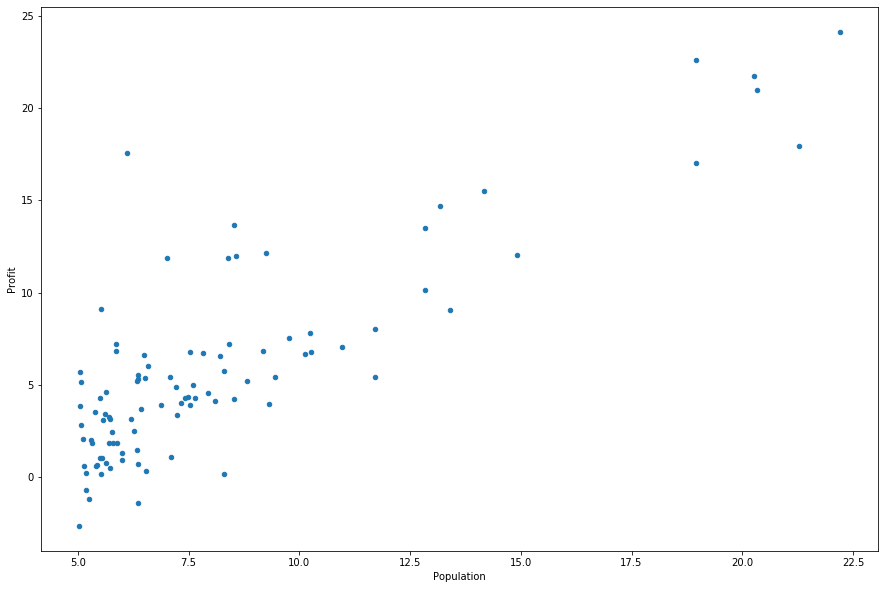

In [0]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(15,10))

#data.T.plot.scatter(x = 'Population', y = 'Profit')

#Goal: fit the linear regression parameters $\mathbf{w}$ to your dataset using gradient descent. 

You suppose that your relation between your data $x$ and target $t$ can be modeled by a linear mode 

$y(x,\mathbf{w})= w_0+w_1x$ \\
The objective of linear regression is to minimize the cost function:

$E(\mathbf{w})=\displaystyle \frac{1}{2N} \sum_{n=1}^{N} \{y(x_n,\mathbf{w})-t_n\}^2 $ \\



$N$ is the number of samples in the data set.


<font color='red'> Question: in this dataset, $N=?$ <font color='blue'> $N = 97$ </font> 



Your model parameters are the $w_j$ values which you will adjust to minimize cost $E(\mathbf{w})$. 
One solution is the batch gradient descent algorithm. In batch gradient descent,each iteration performs the update:

$\mathbf{w}=\displaystyle \mathbf{w} - \eta \frac{1}{N} \sum_{n=1}^{N} \{y(x_n,\mathbf{w})-t_n\}x_n$

With each step of gradient descent, your parameters $w_j$ come closer to the optimal values that will achieve the lowest cost $E(\mathbf{w})$.

<font color='red'> Question: how many parameters $w$ do you have to find for this dataset.  <font color='blue'> It is necessary to find 2 parameters of $w$ for this data set due to the two variables of linearity,  $w$0 + $w$1. </font>
 

<font color='red'>TODO: Create a function to compute the cost of a given solution (characterized by the parameters w). </font> 
Functions like power, sum of numpy may be useful.

#Important notes for implementation in Numpy

For array, * means element-wise multiplication, and the dot() function is used for matrix multiplication.


For matrix, * means matrix multiplication, and the multiply() function is used for element-wise multiplication.


<font color='red'> Maybe in this part (Linear Regression), you should learn to use np.array. In part 2 (Logistic Regression), you learn to use np.matrix </font> 

In [0]:
def computeCost(X, t, w):
    #X : input dataset of shape (N x D+1), N: number of examples, D: the number of features. 
    
    #t : target of shape (N, ).
    
    #w : parameters of shape (D+1, ).
    
    # Note that if you use np.array, * is elementwise multiplication, unlike Matlab,
    # you may need to use it 
    # then using np.sum...

    # you can use np.dot
    # WRITE YOU CODE HERE
    cost = np.power((np.dot(X,w)-t),2)
    # In this dataset, X is Population (each data point has only one variable, one feature)
    # t is profit 
    # but for coding this function, you should consider that X is a np.array... 
    # (array in numpy may have more than one dimension) 
    ...
    return np.sum(cost)/(2.*len(X))

#Do some data preparation.

<font color='red'>TODO: get X (training data) (first column) and t (target variable) (last column) from "data". </font>

In [0]:
# set X (training data) and t (target variable)
cols = data.shape[1]
X = data.iloc[:,0:1]
t = data.iloc[:,1]
print(t)  ##### COMPLETE YOUR CODE HERE#####

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: Profit, Length: 97, dtype: float64


Take a look to make sure X (training set) and t (target variable) look correct.

In [0]:
X.head()

,Population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598


In [0]:
t.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

Let's add a column of ones to the X so we can use a vectorized solution to computing the cost and gradients (use X.insert).

<font color='red'>Question: why do you need to do this? (hint: related to $w_0$)<font color='blue'> We need to insert a column of all ones to perform matrix multiplication. Without the column of ones, it would not be possible. It is also because the $w0$ variable will not be effected by the Population </font>

In [0]:
X.insert(0,'Ones',1)
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


The cost function is expecting numpy array (or matrices) so we need to convert X and t before we can use w (use np.array or np.matrix ...). We also need to initialize w (np.zeros). <font color='red'>Question: explain the shape of w? <font color='blue'>the shape of w is an array with 1 row and 2 columns, both values being 0 due to initialization of $w$. Also, the the number 2 in t shape means that there are 2 elements in the array, and the second value is NULL because this is not a 2D array, thus there are no subset of arrays within arrays. </font> 

In [0]:
X = np.array(X.values)
t = np.array(t.values)  ##### COMPLETE YOUR CODE HERE#####
w = np.zeros(2)   ##### COMPLETE YOUR CODE HERE#####

Let's take a quick look at the shape of our X,t,w.

In [0]:
X.shape, w.shape, t.shape

((97, 2), (2,), (97,))

Now let's compute the cost for our initial solution (0 values for w).

In [0]:
computeCost(X, t, w)

32.072733877455676

Expected result 32.072733877455676. So far so good. 

#<font color='red'>Exercise: Define a function to perform gradient descent on the parameters w using the update rules defined in the text.</font>





Functions like multiply, sum of numpy may be useful.

In [0]:
def gradientDescent(X, t, w, eta, iters):
    # Initialize some useful values
    N= X.shape[0]                    # number of training examples
    cost = np.zeros(iters);  

    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    w = w.copy()
    
    for i in range(iters):
        ##### WRITE YOUR CODE HERE#####
        diff = np.dot(X,w) - t
        deriv = np.dot(X.T,diff)
        w = w - (eta/N)*(deriv)##### COMPLETE YOUR CODE HERE#####

        cost[i] = computeCost(X, t, w) # you should stock the cost function for each epoch
                                    # this is useful for checking whether the cost reduces...
    return w, cost

Initialize some additional variables - the learning rate eta, and the number of iterations to perform.

In [0]:
eta = 0.01
iters = 1000

Now let's run the gradient descent algorithm to fit our parameters eta to the training set.

In [0]:
w, cost = gradientDescent(X, t, w, eta, iters)
w

array([-3.24140214,  1.1272942 ])

Expected result: matrix([[-3.24140214,  1.1272942 ]]).

Finally you can compute the cost (error) of the trained model using our fitted parameters.

In [0]:
computeCost(X, t, w)

4.515955503078914

Expected result: 4.515955503078912.

Now let's plot the linear model along with the data to visually see how well it fits.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

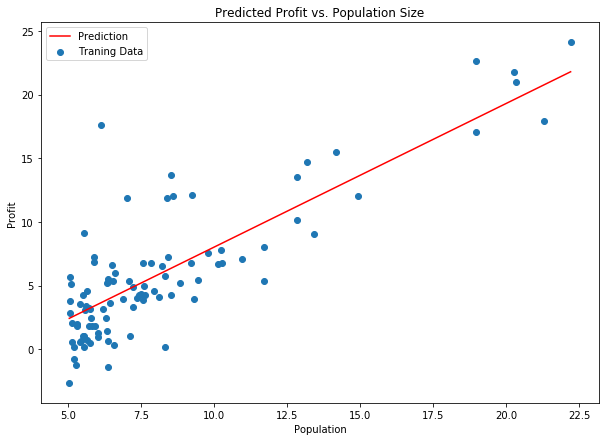

In [0]:
#TODO: to complete
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = w[0] + w[1]*x

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Looks pretty good!  Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.  Notice that the cost always decreases - this is an example of a convex optimization problem.

Text(0.5, 1.0, 'Cost of Linear Regression on Target as Iterations increases')

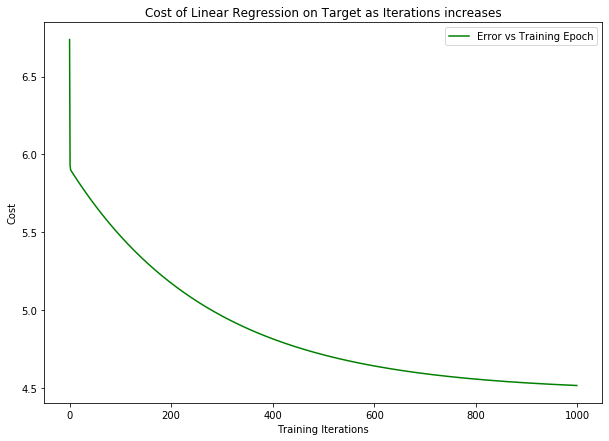

In [0]:
#TODO: plot the error vs. training epoch
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.arange(iters),cost, 'g', label = 'Error vs Training Epoch') #use np.arange(iters) to create an array ...
ax.legend(loc=1)
ax.set_xlabel('Training Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost of Linear Regression on Target as Iterations increases')
##### COMPLETE YOUR CODE HERE#####


## Part 2: Linear regression with multiple variables

This exercise also included a housing price data set with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house).  Let's use the techniques we already applied to analyze that data set as well.

In [0]:
!wget https://www.dropbox.com/s/5b5hnnnn8d4y2o5/ex1data2.txt?dl=0 \
   -O ex1data2.txt



--2020-02-08 13:25:57--  https://www.dropbox.com/s/5b5hnnnn8d4y2o5/ex1data2.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5b5hnnnn8d4y2o5/ex1data2.txt [following]
--2020-02-08 13:25:58--  https://www.dropbox.com/s/raw/5b5hnnnn8d4y2o5/ex1data2.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1108089b854f460104e071b8aa.dl.dropboxusercontent.com/cd/0/inline/AxsCkNbTvZBjbWry8BC1SsKi0uqGYKO5Le-vWv_6kd7yvWve-Eobr8_aMeo4gS-Us6sHydJziBFYrRWcZsbEPPV1aecpblmrZx8B1RSM1vx2zg/file# [following]
--2020-02-08 13:25:58--  https://uc1108089b854f460104e071b8aa.dl.dropboxusercontent.com/cd/0/inline/AxsCkNbTvZBjbWry8BC1SsKi0uqGYKO5Le-vWv_6kd7yvWve-Eobr8_aMeo4gS-Us6sHydJziBFYrRWcZsbEPPV1aecpblmrZx8B1RSM1vx2zg/file
Resolving uc11

The notebook will start by loading and displaying some values from this dataset. 

You then complete the code to:

	- Subtract the mean value of each feature from the dataset. 
	
	- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.” 

In [0]:
file = 'ex1data2.txt'
data2 = pd.read_csv(file, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


<font color='red'>Exercise: add another pre-processing step - normalizing the features. </font>

<font color='red'>Question: why is it necessary? <font color='blue'> The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.  </font>


	

In [0]:
##TODO, normalize your features
#from sklearn import preprocessing

#x = data2.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pd.DataFrame(x_scaled)

data2 = (data2 - data2.mean())/(data2.var())

#Now show the normalized data
data2.head()

,Size,Bedrooms,Price
0,0.000164,-0.293930,3.804760e-06
1,-0.000634,-0.293930,-6.723809e-07
2,0.000632,-0.293930,1.828422e-06
3,-0.000926,-2.020767,-6.933983e-06
4,0.001582,1.432907,1.275904e-05


Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

In [0]:
eta=0.01

# add ones column
#data2.insert(0, 'Ones', 1) ##### COMPLETE YOUR CODE HERE#####

# set X (training data) and t (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:3] 
t2 = data2.iloc[:,3:4]
# convert to matrices/array
X2 = np.matrix(X2)   ##### COMPLETE YOUR CODE HERE#####
t2 = np.matrix(t2)   ##### COMPLETE YOUR CODE HERE#####
# initialize w
# TODO: what is shape of w? why? (w must be a 3 by 1 matrix because our X matrix must perform a dot product with w. Since X is a 47 by 3 matrix, w must be a 3 by 1 matrix)
# ..........................
w2 = np.zeros((3,1))
w2 = np.matrix(w2) ##### COMPLETE YOUR CODE HERE#####
# perform linear regression on the data set
w2, cost2 = gradientDescent(X2, t2, w2, eta, iters)

# get the cost (error) of the model
computeCost(X2, t2, w2)

2.517684128514474e-11

We can take a quick look at the training progess for this one as well.

Text(0.5, 1.0, 'Error vs. Training Epoch')

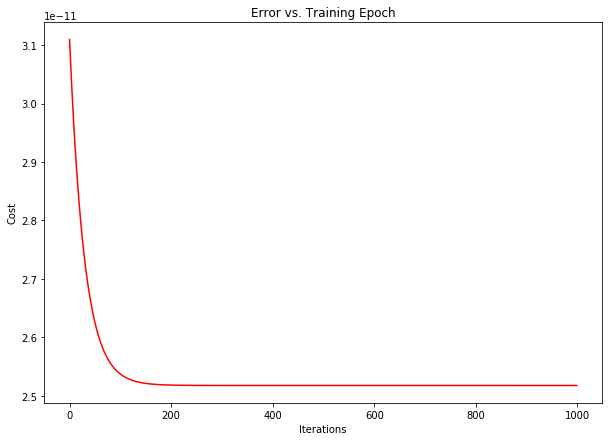

In [0]:
#TODO: plot the error vs. training epoch
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

<font color='red'>Question: What can you see from this figure ?</font>

Answer: <font color='blue'> When we use two input parameters (size and bedrooms in this case) instead of one, our model reaches the optimal cost function value in less iterations (~100 versus ~1000). This tells us that while the count of the data was about half as much, when we have two parameters to base our data on, the linear regression function will reach the optimal parameter values in less time </font>



<font color='red'>Exercise: Try out different learning rates for the dataset and find a learning rate that converges quickly.</font>

In [0]:
###WRITE YOUR CODE HERE
test_eta = np.arange(0.01,1.50,0.01)

cols = data2.shape[1]
X2 = data2.iloc[:,0:3] 
t2 = data2.iloc[:,3:4]
X2 = np.matrix(X2)
t2 = np.matrix(t2)
cost_array = np.zeros(149)
for i in range(149):
  w2 = np.zeros((3,1))
  w2 = np.matrix(w2)
  w2, cost2 = gradientDescent(X2, t2, w2, test_eta[i], iters)

  cost_array[i] = computeCost(X2, t2, w2)
print('The minimum cost value occurs when eta is', test_eta[117], 'and that cost value is', cost_array.min())

#print(np.argmin(cost_array))
# 2.513509682227016e-11 minimum when we go from 0.01 -> 1.50 with 0.01 step

The minimum cost value occurs when eta is 1.18 and that cost value is 2.513509682227016e-11


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in power
  


Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function.  Let's apply scikit-learn's linear regressio algorithm to the data from part 1 and see what it comes up with.

In [0]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Here's what the scikit-learn model's predictions look like.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

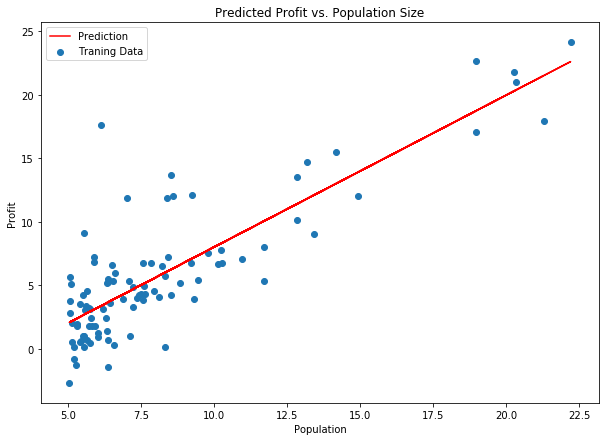

In [0]:
x = np.array(X[:, 1])
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

You can submit now your code via Moodle.
Do not forget to answer the questions!!!